# K Means Clustering Project 

For this project we will attempt to use KMeans Clustering to cluster Universities into to two groups, Private and Public.

___
It is **very important to note, we actually have the labels for this data set, but we will NOT use them for the KMeans clustering algorithm, since that is an unsupervised learning algorithm.** 

When using the Kmeans algorithm under normal circumstances, it is because you don't have labels. In this case we will use the labels to try to get an idea of how well the algorithm performed, but you won't usually do this for Kmeans, so the classification report and confusion matrix at the end of this project, don't truly make sense in a real world setting!.
___

## The Data

We will use a data frame with 777 observations on the following 18 variables.
* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

## Import Libraries

** Import the libraries you usually use for data analysis.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

** Read in the College_Data file using read_csv. Figure out how to set the first column as the index.**

In [2]:
college = pd.read_csv('College_Data', index_col = 0)

**Check the head of the data**

In [3]:
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


** Check the info() and describe() methods on the data.**

In [4]:
college.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 115.3+ KB


In [5]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [6]:
college[(college['Grad.Rate'] == 100) & (college['Private'] == 'No')]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Missouri Southern State College,No,1576,1326,913,13,50,3689,2200,3840,2852,200,400,52,54,20.3,9,4172,100


## EDA

It's time to create some data visualizations!

** Create a scatterplot of Grad.Rate versus Room.Board where the points are colored by the Private column. **

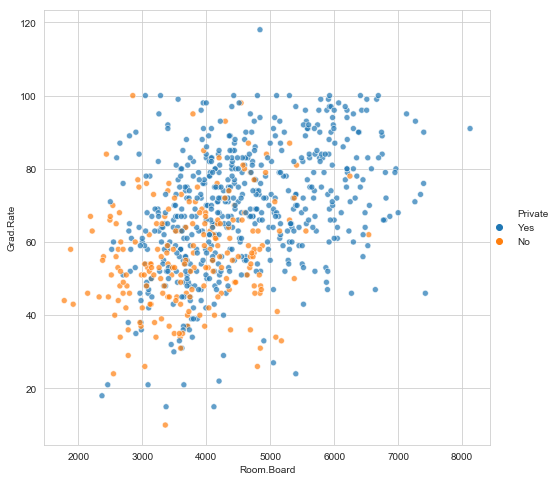

In [7]:
plt.figure(figsize = (8,8))
sns.set_style(style = 'whitegrid')
sns.scatterplot(x = 'Room.Board', y='Grad.Rate', hue ='Private', data = college, alpha = 0.7)
plt.legend(frameon = False, loc = 'center right', bbox_to_anchor=(1.15, 0.5))

**Create a scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column.**

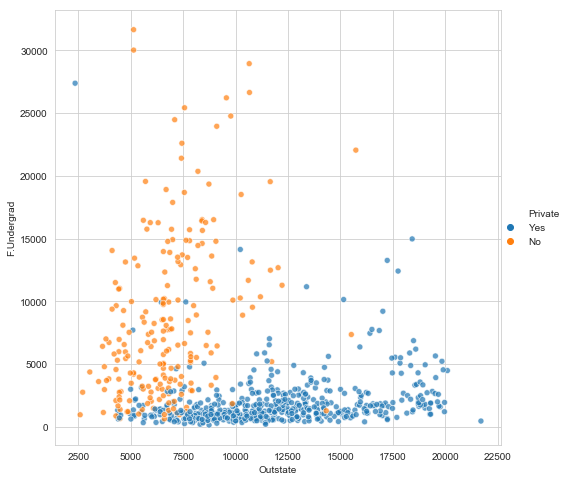

In [8]:
plt.figure(figsize = (8,8))
sns.set_style(style = 'whitegrid')
sns.scatterplot(x = 'Outstate', y='F.Undergrad', hue ='Private', data = college, alpha = 0.7)
plt.legend(frameon = False, loc = 'center right', bbox_to_anchor=(1.15, 0.5))

** Create a stacked histogram showing Out of State Tuition based on the Private column. Try doing this using [sns.FacetGrid](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.FacetGrid.html). If that is too tricky, see if you can do it just by using two instances of pandas.plot(kind='hist'). **

C:\Users\MSI\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


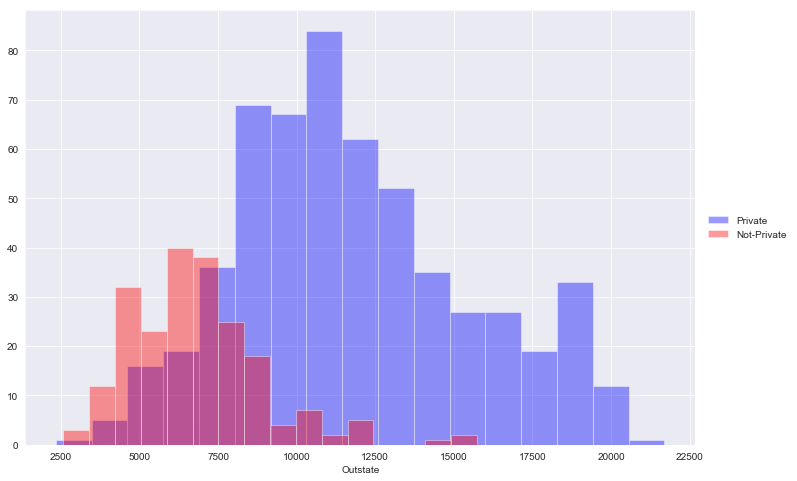

In [9]:
sns.set_style('darkgrid')
plt.figure(figsize = (12,8))
sns.distplot(college[college['Private'] == 'Yes']['Outstate'], label = 'Private', kde =False, color = 'blue')
sns.distplot(college[college['Private'] == 'No']['Outstate'], label = 'Not-Private', kde =False, color = 'red')
plt.legend(frameon= False, loc = 'center right', bbox_to_anchor=(1.15, 0.5) )

**Create a similar histogram for the Grad.Rate column.**

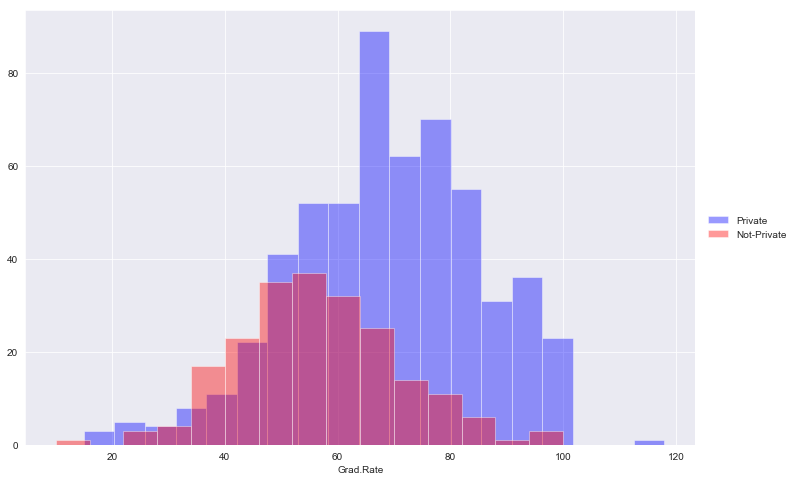

In [10]:
sns.set_style('darkgrid')
plt.figure(figsize = (12,8))
sns.distplot(college[college['Private'] == 'Yes']['Grad.Rate'], label = 'Private', kde =False, color = 'blue')
sns.distplot(college[college['Private'] == 'No']['Grad.Rate'], label = 'Not-Private', kde =False, color = 'red')
plt.legend(frameon= False, loc = 'center right', bbox_to_anchor=(1.15, 0.5) )

** Notice how there seems to be a private school with a graduation rate of higher than 100%.What is the name of that school?**

In [11]:
college[college['Grad.Rate']>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


** Set that school's graduation rate to 100 so it makes sense. You may get a warning not an error) when doing this operation, so use dataframe operations or just re-do the histogram visualization to make sure it actually went through.**

In [12]:
college.at['Cazenovia College', 'Grad.Rate'] = 100

In [ ]:
college[college['Grad.Rate']>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


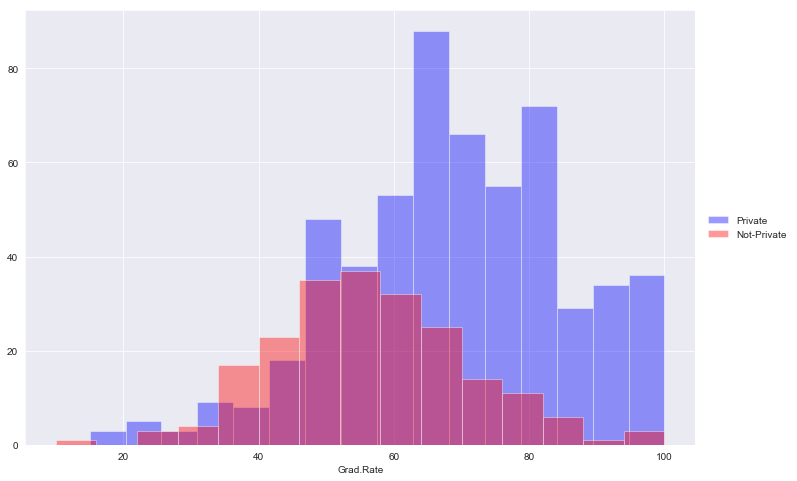

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize = (12,8))
sns.distplot(college[college['Private'] == 'Yes']['Grad.Rate'], label = 'Private', kde =False, color = 'blue')
sns.distplot(college[college['Private'] == 'No']['Grad.Rate'], label = 'Not-Private', kde =False, color = 'red')
plt.legend(frameon= False, loc = 'center right', bbox_to_anchor=(1.15, 0.5) )

In [ ]:
melted = pd.melt(college.drop('Private', axis =1))
melted.tail()

,variable,value
13204,Grad.Rate,40.0
13205,Grad.Rate,83.0
13206,Grad.Rate,49.0
13207,Grad.Rate,99.0
13208,Grad.Rate,99.0


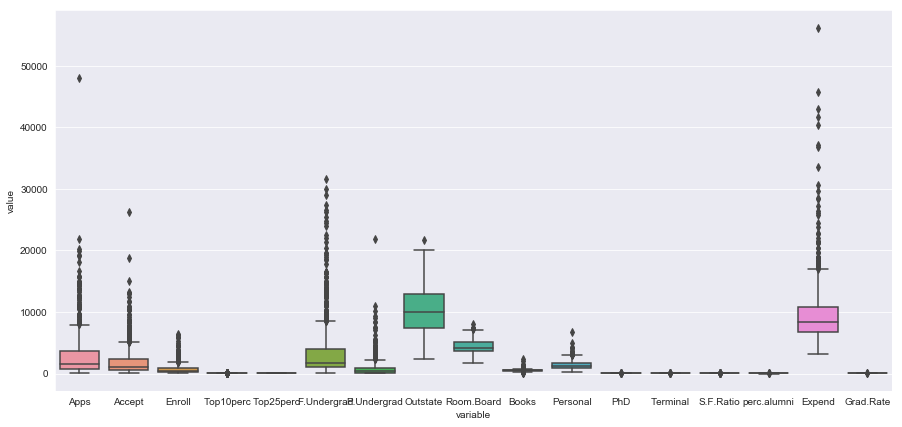

In [ ]:
plt.figure(figsize = (15,7))
sns.boxplot(x='variable', y='value', data = pd.melt(college.drop('Private', axis =1)))

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
scaler.fit(college.drop('Private', axis =1))
scaled_features = scaler.transform(college.drop('Private', axis =1))

C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [ ]:
college_minmax = pd.DataFrame(scaled_features, columns = college.drop('Private', axis =1).columns)
college_minmax.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.032887,0.044177,0.107913,0.231579,0.472527,0.087164,0.024548,0.263430,0.239596,0.157754,0.297710,0.652632,0.710526,0.418231,0.187500,0.072671,0.555556
1,0.043842,0.070531,0.075035,0.157895,0.219780,0.080752,0.056148,0.513430,0.736129,0.291444,0.190840,0.221053,0.078947,0.260054,0.250000,0.138387,0.511111
2,0.028055,0.039036,0.047349,0.221053,0.450549,0.028473,0.004488,0.460227,0.310530,0.135472,0.139695,0.473684,0.552632,0.278820,0.468750,0.104605,0.488889
3,0.006998,0.010549,0.016045,0.621053,0.879121,0.011776,0.002839,0.548554,0.578499,0.157754,0.095420,0.884211,0.960526,0.139410,0.578125,0.298415,0.544444
4,0.002333,0.002818,0.003146,0.157895,0.384615,0.003492,0.039753,0.269628,0.368852,0.313725,0.190840,0.715789,0.631579,0.252011,0.031250,0.145833,0.055556


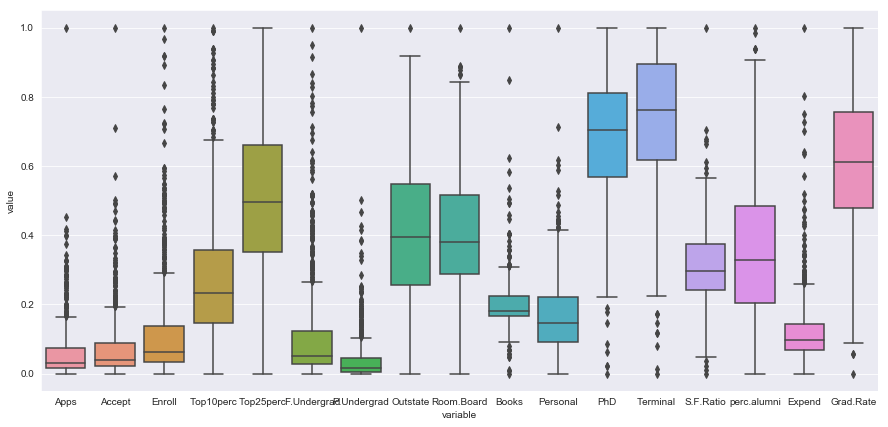

In [ ]:
plt.figure(figsize = (15,7))
sns.boxplot(x='variable', y='value', data = pd.melt(college_minmax))

C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\MSI\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


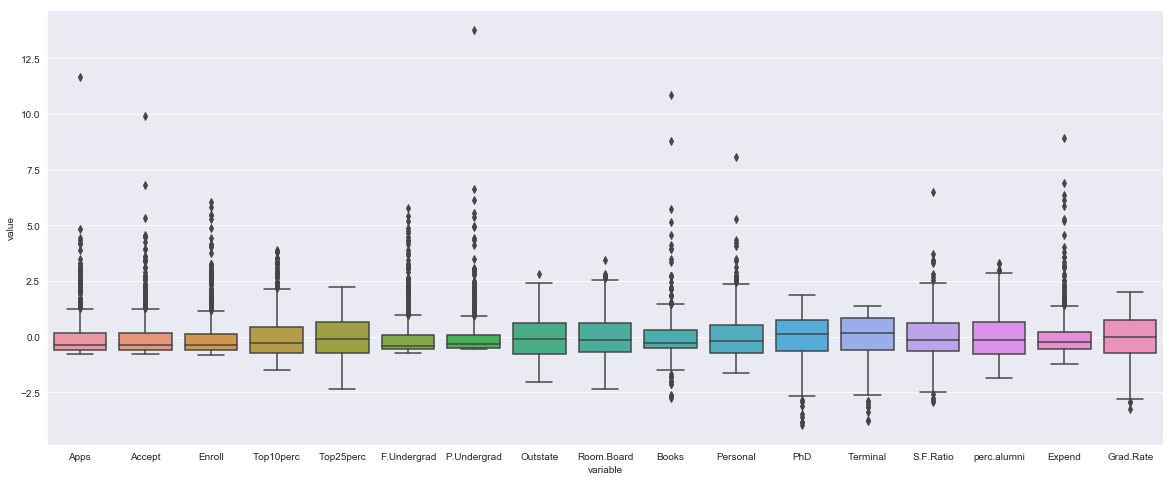

In [ ]:
st_scaler = StandardScaler()
st_scaler.fit(college.drop('Private', axis =1))
plt.figure(figsize = (20,8))
sns.boxplot(x='variable', y='value', data = pd.melt(pd.DataFrame(st_scaler.transform(college.drop('Private', axis =1)),
                                                                 columns = college.drop('Private', axis =1).columns)))

## K Means Cluster Creation

Now it is time to create the Cluster labels!

** Import KMeans from SciKit Learn.**

In [ ]:
from sklearn.cluster import KMeans

** Create an instance of a K Means model with 2 clusters.**

In [ ]:
kmeans = KMeans(n_clusters = 2, random_state = 18)

**Fit the model to all the data except for the Private label.**

In [ ]:
kmeans.fit(college.drop('Private', axis =1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=18, tol=0.0001, verbose=0)

** What are the cluster center vectors?**

In [ ]:
kmeans.cluster_centers_

array([[3.79185271e+03, 2.04663566e+03, 6.53937984e+02, 4.98372093e+01,
        7.72248062e+01, 2.57355039e+03, 2.35829457e+02, 1.69343256e+04,
        5.43727907e+03, 5.74604651e+02, 1.03575194e+03, 8.75193798e+01,
        9.33333333e+01, 1.02046512e+01, 3.51627907e+01, 1.78138140e+04,
        8.02868217e+01],
       [1.06216145e+04, 7.30063855e+03, 2.93942169e+03, 3.20000000e+01,
        6.34698795e+01, 1.54825060e+04, 3.17455422e+03, 8.23585542e+03,
        4.13487952e+03, 5.94349398e+02, 1.88833735e+03, 8.41566265e+01,
        8.95542169e+01, 1.64072289e+01, 1.58072289e+01, 9.44095181e+03,
        6.05060241e+01],
       [1.70182301e+03, 1.23653451e+03, 4.91520354e+02, 2.18194690e+01,
        4.97769912e+01, 2.22618053e+03, 6.56030088e+02, 9.28193982e+03,
        4.14370619e+03, 5.37015929e+02, 1.32979646e+03, 6.75787611e+01,
        7.51433628e+01, 1.46362832e+01, 2.09274336e+01, 7.83074690e+03,
        6.27752212e+01]])

## Evaluation

There is no perfect way to evaluate clustering if you don't have the labels, however since this is just an exercise, we do have the labels, so we take advantage of this to evaluate our clusters, keep in mind, you usually won't have this luxury in the real world.

** Create a new column for df called 'Cluster', which is a 1 for a Private school, and a 0 for a public school.**

In [ ]:
matrix = []

for i in college['Private']:
    if i == 'Yes':
        matrix.append(1)
    else:
        matrix.append(0)
college['Cluster'] = matrix        

In [ ]:
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


** Create a confusion matrix and classification report to see how well the Kmeans clustering worked without being given any labels.**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(confusion_matrix(college['Cluster'], kmeans.labels_))
print(classification_report(college['Cluster'], kmeans.labels_))      

[[  1  76 135]
 [128   7 430]
 [  0   0   0]]
              precision    recall  f1-score   support

           0       0.01      0.00      0.01       212
           1       0.08      0.01      0.02       565
           2       0.00      0.00      0.00         0

   micro avg       0.01      0.01      0.01       777
   macro avg       0.03      0.01      0.01       777
weighted avg       0.06      0.01      0.02       777



C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [ ]:
college['group'] = kmeans.labels_
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster,group
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1,2
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1,2
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1,2
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1,0
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1,2


In [ ]:
len(college[(college['group'] != college['Cluster']) & (college['Cluster'] == 0)])/(len(college[college['Cluster'] == 0]))

0.9952830188679245

In [ ]:
dfOutlierPublic = college[(college['group'] != college['Cluster']) & (college['Cluster'] == 0)].copy()
dfExactPublic = college[(college['group'] == college['Cluster']) & (college['Cluster'] == 0)].copy()
dfPublic = college[college['Cluster'] == 0].copy()
dfPublic.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster,group
Angelo State University,No,3540,2001,1016,24,54,4190,1512,5130,3592,500,2000,60,62,23.1,5,4010,34,0,2
Appalachian State University,No,7313,4664,1910,20,63,9940,1035,6806,2540,96,2000,83,96,18.3,14,5854,70,0,1
Arizona State University Main campus,No,12809,10308,3761,24,49,22593,7585,7434,4850,700,2100,88,93,18.9,5,4602,48,0,1
Arkansas Tech University,No,1734,1729,951,12,52,3602,939,3460,2650,450,1000,57,60,19.6,5,4739,48,0,2
Auburn University-Main Campus,No,7548,6791,3070,25,57,16262,1716,6300,3933,600,1908,85,91,16.7,18,6642,69,0,1


C:\Users\MSI\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


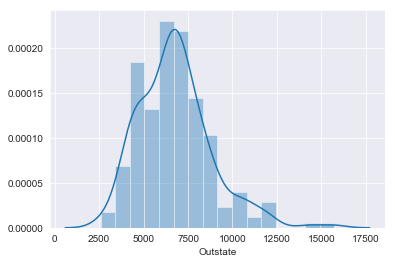

In [ ]:
sns.distplot(dfOutlierPublic['Outstate'])

In [ ]:
sse = []
k = list(range(1, 21))
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(college.drop('Private', axis =1))
    sse.append(kmeans.inertia_)

plt.plot(k, sse, marker = 'o')
plt.xlabel('Number of K')
plt.ylabel('Sum of Squared Distance')
plt.show()

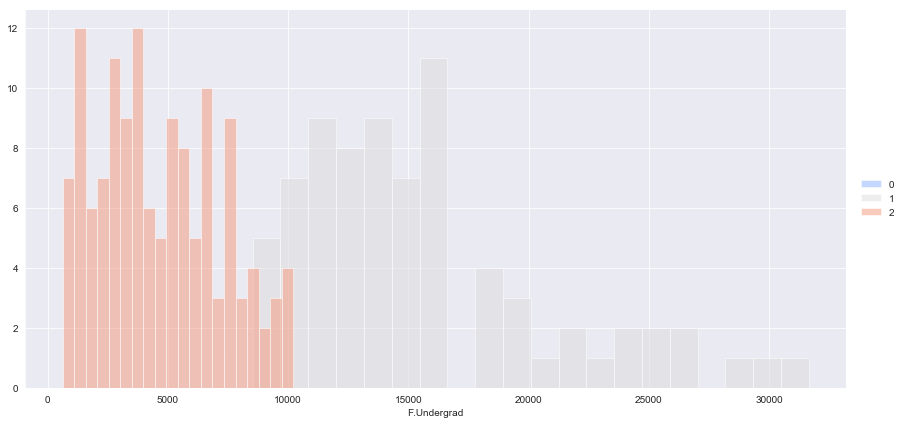

In [ ]:
sns.set_style(style = 'darkgrid')
g = sns.FacetGrid(dfPublic, hue='group', palette= 'coolwarm', height = 6, aspect = 2)
g = g.map(plt.hist, 'F.Undergrad', bins = 20, alpha = 0.5)
plt.legend(frameon= False, loc = 'center right', bbox_to_anchor=(1.07, 0.5))

In [ ]:
sns.pairplot(dfPublic, hue ='group')

C:\Users\MSI\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\MSI\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\MSI\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\MSI\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


Not so bad considering the algorithm is purely using the features to cluster the universities into 2 distinct groups! Hopefully you can begin to see how K Means is useful for clustering un-labeled data!

## Great Job!